# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_weather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create a for loop to run through each city in the cities list, creata a list to hold info for data frame
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
print(f"Beginning data retrieval")
print(f"--------------------------------")
for i,city in enumerate(cities):

# Create the URL for the corresponding city
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_weather}&units=imperial"
    
# Perform the "requests.get().json()"
    response = requests.get(url).json()
    if "main" not in response:
        print(f"City not found....Skipping")
        continue

# Get the info for the data frame (store into lists using .append)
    city_name.append(response["name"])
    latitude.append(response["coord"]["lat"])
    longitude.append(response["coord"]["lon"])
    max_temp.append(response["main"]["temp_max"])
    humidity.append(response["main"]["humidity"])
    cloudiness.append(response["clouds"]["all"])
    wind_speed.append(response["wind"]["speed"])
    country.append(response["sys"]["country"])
    date.append(response["dt"])

# Print out the correct string "Processing Record #| city_name"
    print(f'Processing Record {i}| {city}')
print(f"--------------------------------")
print(f"Data retrieval complete")
print(f"--------------------------------")

Beginning data retrieval
--------------------------------
Processing Record 0| albany
Processing Record 1| rikitea
Processing Record 2| narrabri
City not found....Skipping
Processing Record 4| victoria
Processing Record 5| ribeira grande
Processing Record 6| rorvik
City not found....Skipping
Processing Record 8| vaini
Processing Record 9| tuktoyaktuk
Processing Record 10| san patricio
Processing Record 11| ushuaia
Processing Record 12| kaitangata
Processing Record 13| motygino
Processing Record 14| high level
Processing Record 15| bredasdorp
Processing Record 16| puerto ayora
Processing Record 17| walvis bay
Processing Record 18| okha
Processing Record 19| carnarvon
Processing Record 20| clyde river
Processing Record 21| ilulissat
Processing Record 22| manggar
Processing Record 23| mar del plata
Processing Record 24| khatanga
Processing Record 25| chaman
City not found....Skipping
Processing Record 27| gornopravdinsk
Processing Record 28| camopi
Processing Record 29| punta arenas
Proce

City not found....Skipping
Processing Record 260| makaryev
Processing Record 261| ahipara
Processing Record 262| kavieng
Processing Record 263| delcevo
Processing Record 264| saint george
Processing Record 265| kurush
Processing Record 266| namatanai
Processing Record 267| mumford
Processing Record 268| henties bay
Processing Record 269| yumen
Processing Record 270| arcata
Processing Record 271| canberra
City not found....Skipping
Processing Record 273| beringovskiy
Processing Record 274| deputatskiy
Processing Record 275| lishu
Processing Record 276| askarovo
Processing Record 277| san fernando
Processing Record 278| tauranga
Processing Record 279| yarada
Processing Record 280| lata
Processing Record 281| nouadhibou
Processing Record 282| kurilsk
City not found....Skipping
Processing Record 284| tuatapere
Processing Record 285| hasaki
Processing Record 286| sioux lookout
City not found....Skipping
Processing Record 288| patnos
Processing Record 289| vendome
Processing Record 290| bodh

City not found....Skipping
Processing Record 517| townsville
Processing Record 518| grootfontein
Processing Record 519| nizwa
Processing Record 520| kodinsk
Processing Record 521| goderich
Processing Record 522| rabaul
Processing Record 523| monostorpalyi
Processing Record 524| marzuq
Processing Record 525| volovo
Processing Record 526| champerico
Processing Record 527| dubbo
Processing Record 528| sambava
Processing Record 529| marsa matruh
Processing Record 530| nakhon phanom
Processing Record 531| muros
Processing Record 532| airai
Processing Record 533| abu zabad
Processing Record 534| tekeli
Processing Record 535| dudinka
Processing Record 536| tezu
Processing Record 537| camacha
City not found....Skipping
Processing Record 539| qingdao
Processing Record 540| mendi
Processing Record 541| altay
Processing Record 542| aberdeen
Processing Record 543| paamiut
Processing Record 544| alba
Processing Record 545| dunedin
Processing Record 546| ponca city
Processing Record 547| sayhat
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_info = {"City":city_name,
             "Lat":latitude,
             "Lng":longitude,
             "Max Temp":max_temp,
             "Humidity":humidity,
             "Cloudiness":cloudiness,
             "Wind Speed":wind_speed,
             "Country":country,
             "Date":date
             }
city_df = pd.DataFrame(city_info)
city_df.head()

# Save the data fram in a .csv file
city_df.to_csv('city_df.csv', index = False, header=True)

In [5]:
# Print out a description of the data frame using .describe()
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,21.002592,25.232298,54.651912,75.694853,50.501838,7.263437,1.605234e+09
std,34.058318,89.607561,24.341659,18.500577,40.561574,5.379877,1.248093e+02
min,-54.800000,-175.200000,-17.930000,8.000000,0.000000,0.360000,1.605233e+09
25%,-7.052500,-51.350000,39.082500,66.000000,1.000000,3.360000,1.605234e+09
50%,28.195000,26.800000,60.800000,80.000000,53.000000,6.005000,1.605234e+09
75%,50.212500,103.917500,73.990000,90.000000,90.000000,9.680000,1.605234e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,35.570000,1.605234e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Use loc to locate the rows that have humidity less than or equal to 100 and print out
city_low_humidity = city_df.loc[city_df["Humidity"] <= 100]
city_low_humidity.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,42.01,70,100,3.80,US,1605233885
1,Rikitea,-23.12,-134.97,74.66,74,73,15.41,PF,1605233915
2,Narrabri,-30.32,149.78,82.40,37,0,26.40,AU,1605234094
3,Hong Kong,22.29,114.16,75.99,38,0,11.41,HK,1605233843
4,Ribeira Grande,38.52,-28.70,63.34,81,3,3.18,PT,1605234096


In [7]:
#  Get the indices of cities that have humidity over 100%.
# Use the loc to locate rows that humidity greater than 100
city_high_humidity = city_df.loc[city_df["Humidity"] > 100]
city_high_humidity

# Results show that there are no cities that have humidity greater than 100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Find the Q1 and Q3 of humidity, then find the upper and lower bounds, then use loc to find all the cities that have humidities between the upper and lower bounds
lower_quart = city_df.describe()["Humidity"][4]
upper_quart = city_df.describe()["Humidity"][6]
iqr = (upper_quart - lower_quart)
lower_bound = lower_quart - (1.5 * iqr)
upper_bound = upper_quart + (1.5 * iqr)
print(f"The lower bound for humidity is {lower_bound} and the upper bound for humidity is {upper_bound}.")
clean_city_data = city_df.loc[(city_df["Humidity"] > lower_bound) & (city_df["Humidity"] < upper_bound)]
clean_city_data.head()

The lower bound for humidity is 30.0 and the upper bound for humidity is 126.0.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,42.01,70,100,3.80,US,1605233885
1,Rikitea,-23.12,-134.97,74.66,74,73,15.41,PF,1605233915
2,Narrabri,-30.32,149.78,82.40,37,0,26.40,AU,1605234094
3,Hong Kong,22.29,114.16,75.99,38,0,11.41,HK,1605233843
4,Ribeira Grande,38.52,-28.70,63.34,81,3,3.18,PT,1605234096


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

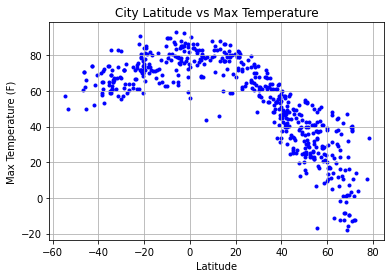

<Figure size 432x288 with 0 Axes>

In [9]:
# Make a scatter plot showing latitude vs max temp using the clean_city_data
# Store the x and y axis as variables from the very beginning
# Use proper labels on x and y axis, store the plot as a PNG image
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Max Temp"]
plt.scatter(x_axis, y_axis, marker=".", color="blue")
plt.grid()
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
plt.savefig("latitude_vs_temperature.png")

## Latitude vs. Humidity Plot

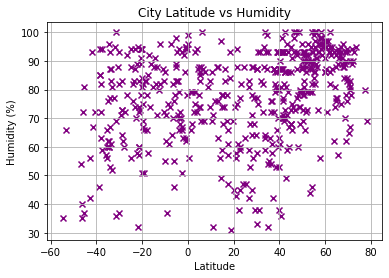

<Figure size 432x288 with 0 Axes>

In [10]:
# Make a scatter plot showing latitude vs humidity using the clean_city_data
# Store the x and y axis as variables from the very beginning
# Use proper labels on x and y axis, store the plot as a PNG image
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Humidity"]
plt.scatter(x_axis, y_axis, marker="x", color="purple")
plt.grid()
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
plt.savefig("latitude_vs_humidity.png")

## Latitude vs. Cloudiness Plot

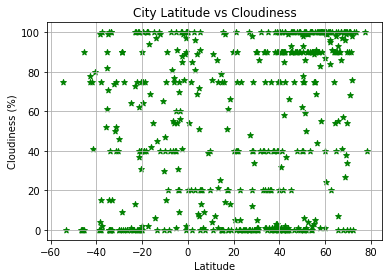

<Figure size 432x288 with 0 Axes>

In [11]:
# Make a scatter plot showing latitude vs humidity using the clean_city_data
# Store the x and y axis as variables from the very beginning
# Use proper labels on x and y axis, store the plot as a PNG image
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="*", color="green",)
plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
plt.savefig("latitude_vs_cloudiness.png")

## Latitude vs. Wind Speed Plot

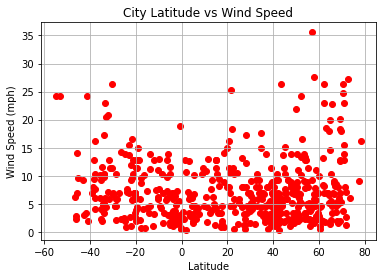

<Figure size 432x288 with 0 Axes>

In [12]:
# Make a scatter plot showing latitude vs humidity using the clean_city_data
# Store the x and y axis as variables from the very beginning
# Use proper labels on x and y axis, store the plot as a PNG image
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", color="red",)
plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
plt.savefig("latitude_vs_wind_speed.png")

## Linear Regression

In [13]:
# Calculate the linear regression model for the northern hemisphere and southern hemishpere separately
# Use the loc on latitude to find the cities that have latitude greater than 0 (north) and less than 0 (south)
x_values_north = clean_city_data.loc[clean_city_data["Lat"] > 0]["Lat"]
y_values_north = clean_city_data.loc[clean_city_data["Lat"] > 0]["Max Temp"]
x_values_south = clean_city_data.loc[clean_city_data["Lat"] < 0]["Lat"]
y_values_south = clean_city_data.loc[clean_city_data["Lat"] < 0]["Max Temp"]

# Perform the linear regression using linregress on the north values and then on the south values
(slope_north_temp, int_north_temp, rvalue_north_temp, pvalue_north_temp, stderr_north_temp) = linregress(x_values_north, y_values_north)
(slope_south_temp, int_south_temp, rvalue_south_temp, pvalue_south_temp, stderr_south_temp) = linregress(x_values_south, y_values_south)

# Print out a statement for the correlation coefficient
print(f"The correlation coefficient is {round(rvalue_north_temp,3)} for the northern hemisphere maximum temperatures.")
print(f"The correlation coefficient is {round(rvalue_south_temp,3)} for the southern hemisphere maximum temperatures.")
print("-----------------------")

# Print out the two equations for the linear model
regress_values_north = x_values_north * slope_north_temp + int_north_temp
line_eq_north = "y = " + str(round(slope_north_temp,2)) + "x +" + str(round(int_north_temp,2))
print(f"The least squares regression line for northern hemisphere cities is given by {line_eq_north}.")
regress_values_south = x_values_south * slope_south_temp + int_south_temp
line_eq_south = "y = " + str(round(slope_south_temp,2)) + "x +" + str(round(int_south_temp,2))
print(f"The least squares regression line for southern hemisphere cities is given by {line_eq_south}.")

The correlation coefficient is -0.865 for the northern hemisphere maximum temperatures.
The correlation coefficient is 0.6 for the southern hemisphere maximum temperatures.
-----------------------
The least squares regression line for northern hemisphere cities is given by y = -1.11x +91.77.
The least squares regression line for southern hemisphere cities is given by y = 0.42x +80.8.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8652049603164748


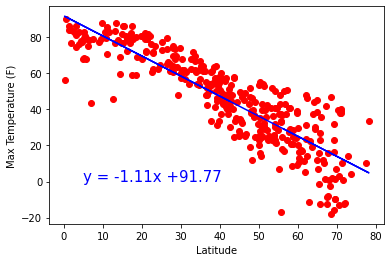

<Figure size 432x288 with 0 Axes>

In [14]:
# Create scatter plot for the northern hemisphere cities measuring the latitude vs max temperature
# Include the line of best fit on the plot as well
print(f"The r-value is: {rvalue_north_temp}")
plt.scatter(x_values_north, y_values_north, marker="o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.plot(x_values_north, regress_values_north, "b-")
plt.annotate(line_eq_north,(5,0),fontsize=15,color="blue")
plt.show()
plt.savefig("northern_latitude_vs_temperature.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5996129997375301


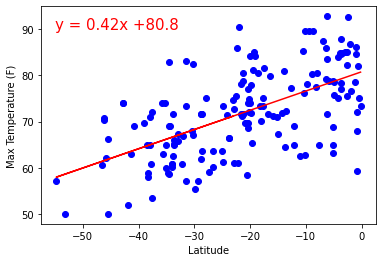

<Figure size 432x288 with 0 Axes>

In [15]:
# Create scatter plot for the southern hemisphere cities measuring the latitude vs max temperature
# Include the line of best fit on the plot as well
print(f"The r-value is: {rvalue_south_temp}")
plt.scatter(x_values_south, y_values_south, marker="o", color="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.plot(x_values_south, regress_values_south, "r-")
plt.annotate(line_eq_south,(-55,90),fontsize=15,color="red")
plt.show()
plt.savefig("southern_latitude_vs_temperature.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.33765909440058756


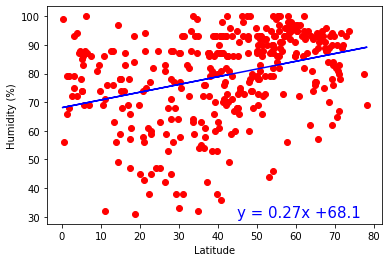

<Figure size 432x288 with 0 Axes>

In [16]:
# Calculate the linear regression model for humidity in northern hemisphere
x_values = clean_city_data.loc[clean_city_data["Lat"] > 0]["Lat"]
y_values = clean_city_data.loc[clean_city_data["Lat"] > 0]["Humidity"]

# Perform the linear regression using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation for the linear model
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print the r-value
print(f"The r-value is: {rvalue}")

# Create the scatter plot with titles and linear equation on plot
plt.scatter(x_values, y_values, marker="o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.plot(x_values, regress_values, "b-")
plt.annotate(line_eq, (45,30), fontsize=15, color="blue")
plt.show()
plt.savefig("northern_latitude_vs_humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.27348372242785546


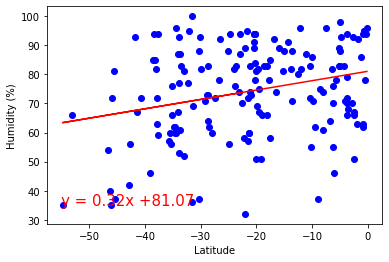

<Figure size 432x288 with 0 Axes>

In [17]:
# Calculate the linear regression model for humidity in southern hemisphere
x_values = clean_city_data.loc[clean_city_data["Lat"] < 0]["Lat"]
y_values = clean_city_data.loc[clean_city_data["Lat"] < 0]["Humidity"]

# Perform the linear regression using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation for the linear model
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print the r-value
print(f"The r-value is: {rvalue}")

# Create the scatter plot with titles and linear equation on plot
plt.scatter(x_values, y_values, marker="o", color="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,35), fontsize=15, color="red")
plt.show()
plt.savefig("southern_latitude_vs_humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.36076686025361787


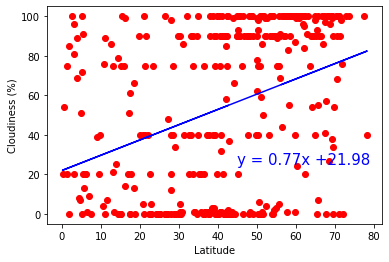

<Figure size 432x288 with 0 Axes>

In [18]:
# Calculate the linear regression model for cloudiness in northern hemisphere
x_values = clean_city_data.loc[clean_city_data["Lat"] > 0]["Lat"]
y_values = clean_city_data.loc[clean_city_data["Lat"] > 0]["Cloudiness"]

# Perform the linear regression using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation for the linear model
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print the r-value
print(f"The r-value is: {rvalue}")

# Create the scatter plot with titles and linear equation on plot
plt.scatter(x_values, y_values, marker="o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.plot(x_values, regress_values, "b-")
plt.annotate(line_eq, (45,25), fontsize=15, color="blue")
plt.show()
plt.savefig("northern_latitude_vs_cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2521368745622679


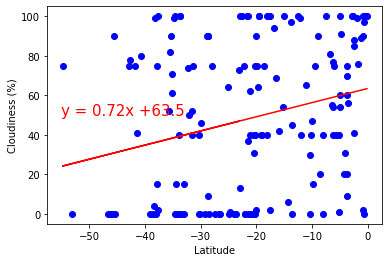

<Figure size 432x288 with 0 Axes>

In [19]:
# Calculate the linear regression model for cloudiness in southern hemisphere
x_values = clean_city_data.loc[clean_city_data["Lat"] < 0]["Lat"]
y_values = clean_city_data.loc[clean_city_data["Lat"] < 0]["Cloudiness"]

# Perform the linear regression using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation for the linear model
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print the r-value
print(f"The r-value is: {rvalue}")

# Create the scatter plot with titles and linear equation on plot
plt.scatter(x_values, y_values, marker="o", color="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,50), fontsize=15, color="red")
plt.show()
plt.savefig("southern_latitude_vs_cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.175051470184961


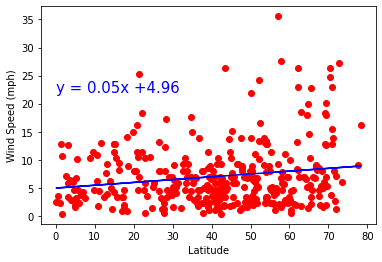

<Figure size 432x288 with 0 Axes>

In [20]:
# Calculate the linear regression model for wind speed in northern hemisphere
x_values = clean_city_data.loc[clean_city_data["Lat"] > 0]["Lat"]
y_values = clean_city_data.loc[clean_city_data["Lat"] > 0]["Wind Speed"]

# Perform the linear regression using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation for the linear model
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print the r-value
print(f"The r-value is: {rvalue}")

# Create the scatter plot with titles and linear equation on plot
plt.scatter(x_values, y_values, marker="o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.plot(x_values, regress_values, "b-")
plt.annotate(line_eq, (0,22), fontsize=15, color="blue")
plt.show()
plt.savefig("northern_latitude_vs_wind_speed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3165703176124164


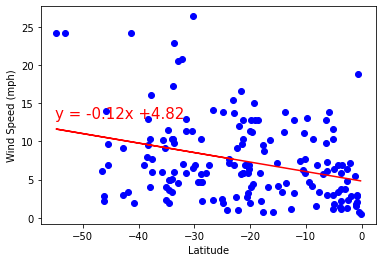

<Figure size 432x288 with 0 Axes>

In [21]:
# Calculate the linear regression model for wind speed in southern hemisphere
x_values = clean_city_data.loc[clean_city_data["Lat"] < 0]["Lat"]
y_values = clean_city_data.loc[clean_city_data["Lat"] < 0]["Wind Speed"]

# Perform the linear regression using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation for the linear model
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print the r-value
print(f"The r-value is: {rvalue}")

# Create the scatter plot with titles and linear equation on plot
plt.scatter(x_values, y_values, marker="o", color="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,13), fontsize=15, color="red")
plt.show()
plt.savefig("southern_latitude_vs_wind_speed.png")